In [1]:
"""
This program demonstrates Quantum Phase Estimation on the T-gate, a unitary operation.
We expect to find an eigenvalue = 1/8 from eigenvector = 1 for a T-gate operation.
This program estimates the eigenvalue using 3 qubits.
"""
#Import python math libraries
import matplotlib.pyplot as plt
import numpy as np
import math
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.visualization import *

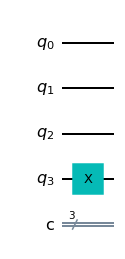

In [2]:
"""
Initialize a quantum circuit. Our circuit will demonstrate the process of Quantum Phase Estimation.

Add four qubits and three classical bits: 
    - three qubits to hold the estimated eigenvalue and one qubit to store the eigenvector.
    - three classical bits to measure the final estimation.
Recall that the eigenvector is 1, so apply a X-gate to the fourth qubit (this puts it in the 1-state).
"""
qpe_circuit = QuantumCircuit(4, 3)
num_of_estimate_qubits = 3
qpe_circuit.x(3)
qpe_circuit.draw('mpl')

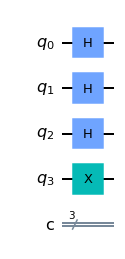

In [3]:
"""
Next, put the three eigenvalue qubits into superpostion with Hadamard gates, or H-gates.
"""
for qubit in range(num_of_estimate_qubits):
    qpe_circuit.h(qubit)
qpe_circuit.draw('mpl')

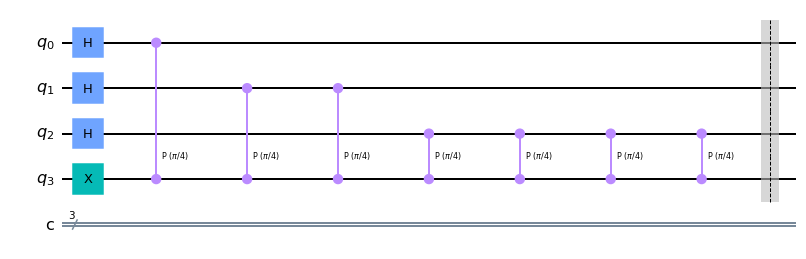

In [4]:
"""
Apply unitary operations on qubits.
    - Q0 has 1 operation  (2^0)
    - Q1 has 2 operations (2^1)
    - Q2 has 4 operations (2^2)
"""
number_of_operations = 1
for qubit in range(num_of_estimate_qubits):
    for i in range(number_of_operations):
        qpe_circuit.cp(math.pi/4, qubit, num_of_estimate_qubits); # This is C-U
    number_of_operations *= 2
    
qpe_circuit.barrier()
qpe_circuit.draw('mpl')

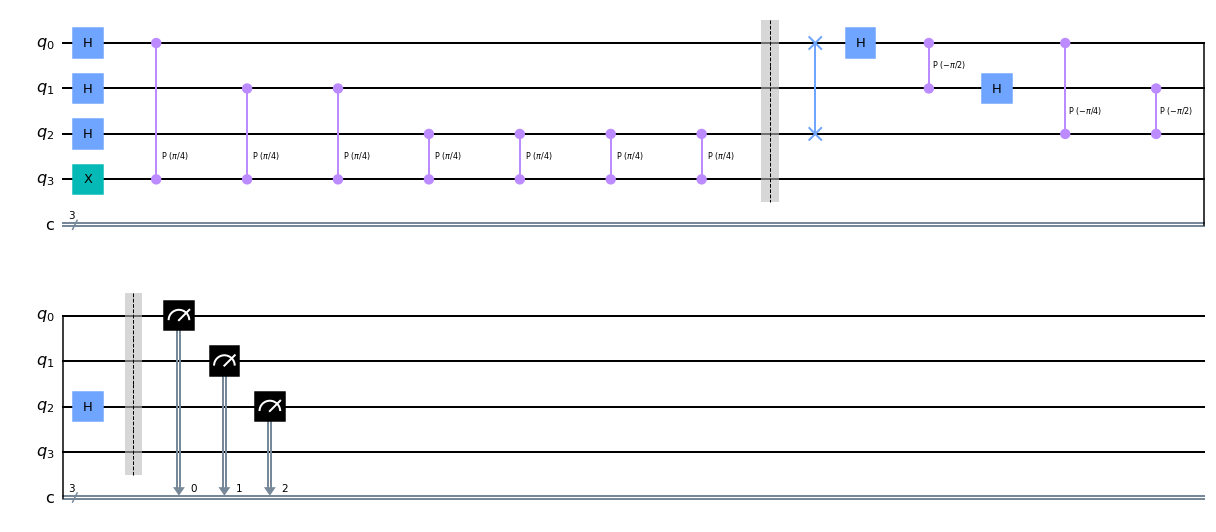

In [5]:
"""
The next part is two apply an Inverse Quantum Fourier Transformation on the three eigenvalue qubits.
The 'qft_dagger' method was authored by Qiskit.
"""
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)
        
# Apply Inverse Quantum Fourier Transformation
qft_dagger(qpe_circuit, num_of_estimate_qubits)
# Measure the three qubits storing the estimated eigenvalue
qpe_circuit.barrier()
for qubit in range(num_of_estimate_qubits):
    qpe_circuit.measure(qubit,qubit)
qpe_circuit.draw('mpl')

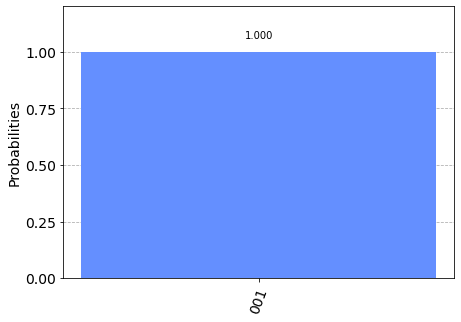

In [6]:
"""
Awesome! Our circuit is now complete! Let's simulate this process and obtain a 
simulated measurement for our eigenvalue/qubits. 
"""
simulator = Aer.get_backend('qasm_simulator')
num_of_shots = 2048
transpile = transpile(qpe_circuit, simulator)
simulator_job = assemble(transpile, shots=num_of_shots)
# Run the circuit with 2048 shots and plot a histogram of the measured qubits
results = simulator.run(simulator_job).result()
answer = results.get_counts()

# We can interpret our binary answers as rightmost bit = Q2, leftmost bit = Q0
# Therefore a value of 100 = 4, 010 = 2, 001 = 1
plot_histogram(answer)

In [ ]:
ANSWER: 1 (base 10)

To get our eigenvalue, divide our answer by 2^n:
    Answer/(2^3) = 1/8
    
Our simulated circuit gave us the expected answer!!
Now we will try with a real quantum computer.

In [7]:
# Load my IBMQ account and execute job
provider = IBMQ.load_account()
qcomp = provider.get_backend('ibmq_16_melbourne')
quantum_job = execute(qpe_circuit, backend = qcomp)

In [10]:
# Show status of job
from qiskit.tools.monitor import job_monitor
job_monitor(quantum_job)

Job Status: job has successfully run


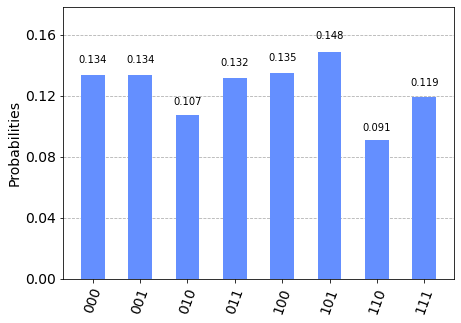

In [11]:
quantum_result = quantum_job.result()
quantum_answer = quantum_result.get_counts(qpe_circuit)
plot_histogram(quantum_answer)